In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
cars_data = pd.read_csv('cars_sampled.csv')

In [4]:
cars = cars_data.copy()

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
dateCrawled            50001 non-null object
name                   50001 non-null object
seller                 50001 non-null object
offerType              50001 non-null object
price                  50001 non-null int64
abtest                 50001 non-null object
vehicleType            44813 non-null object
yearOfRegistration     50001 non-null int64
gearbox                47177 non-null object
powerPS                50001 non-null int64
model                  47243 non-null object
kilometer              50001 non-null int64
monthOfRegistration    50001 non-null int64
fuelType               45498 non-null object
brand                  50001 non-null object
notRepairedDamage      40285 non-null object
dateCreated            50001 non-null object
postalCode             50001 non-null int64
lastSeen               50001 non-null object
dtypes: int64(6), object(13)
memory usage:

In [7]:
#summarizing Data

cars.describe()
pd.set_option('display.float_format', lambda x: '%.3f' %x)
#cars.describe()

In [9]:
# to desplay maximum set of colums
pd.set_option('display.max_columns' , 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [10]:
# droping unwanted colums

col = ['name', 'dateCrawled', 'dateCreated', 'postalCode','lastSeen']
cars = cars.drop(columns=col , axis =1)

In [11]:
#removing duplicate records
cars.drop_duplicates(keep='first' , inplace=True)
#470 duplocates records

In [12]:
cars.shape

(49531, 14)

In [13]:
#data Cleaning

# no of missing values

cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [14]:
# varible yearof registration

yearwise_count = cars['yearOfRegistration'].value_counts().sort_index()

In [15]:
yearwise_count

1000       6
1255       1
1500       2
1910      14
1928       1
1929       1
1933       1
1934       1
1936       2
1938       1
1940       1
1941       1
1943       2
1945       2
1947       2
1950       4
1951       4
1952       3
1953       2
1954       1
1955       6
1956       7
1957       5
1958       4
1959       5
1960      32
1961       7
1962       6
1963      11
1964      16
        ... 
2002    2554
2003    2731
2004    2597
2005    3101
2006    2660
2007    2347
2008    2186
2009    2010
2010    1643
2011    1544
2012    1235
2013     816
2014     623
2015     405
2016    1351
2017    1375
2018     528
2019       2
2222       1
2900       1
3000       1
3500       1
3800       1
5000       3
6000       4
7500       1
7800       1
8500       1
8888       2
9999       7
Name: yearOfRegistration, Length: 97, dtype: int64

In [16]:
sum(cars['yearOfRegistration']>2018)

26

In [17]:
sum(cars['yearOfRegistration']<1950)

38

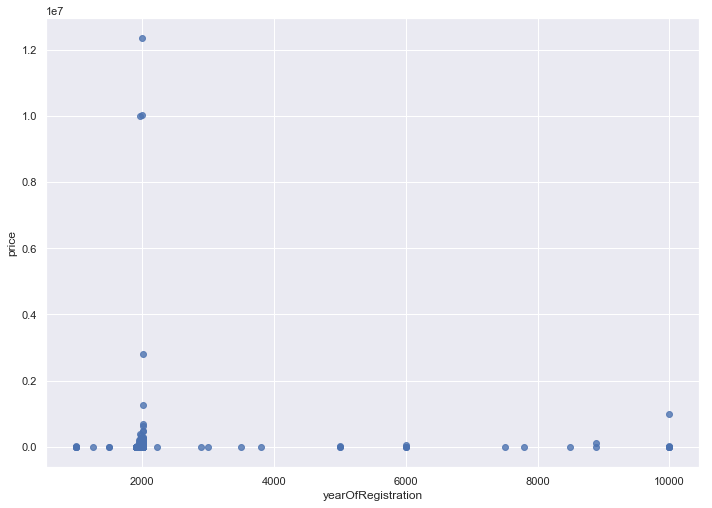

In [18]:
sns.regplot(x='yearOfRegistration',y = 'price', scatter= True ,
           fit_reg=False, data=cars)

In [19]:
#working range 1950 and 2018

#variable price

price_count = cars['price'].value_counts().sort_index()

In [20]:
price_count

0           1415
1            172
2              1
3              1
5              4
7              1
8              2
10             5
11             1
12             1
14             1
15             8
20             6
21             1
25             5
26             1
30             7
35             4
39             1
40             3
45             6
50            41
55             3
60             7
65             1
70             2
75             9
77             1
80            12
85             3
            ... 
163991         1
165000         1
169999         1
171000         1
175000         1
179999         1
189981         1
205000         1
214800         1
225000         1
230000         2
239000         1
249000         1
250000         1
257500         1
260000         1
270000         1
300000         1
370000         1
395000         1
485000         1
487000         1
619000         1
700000         1
999999         1
1250000        1
2795000        1
9999999       

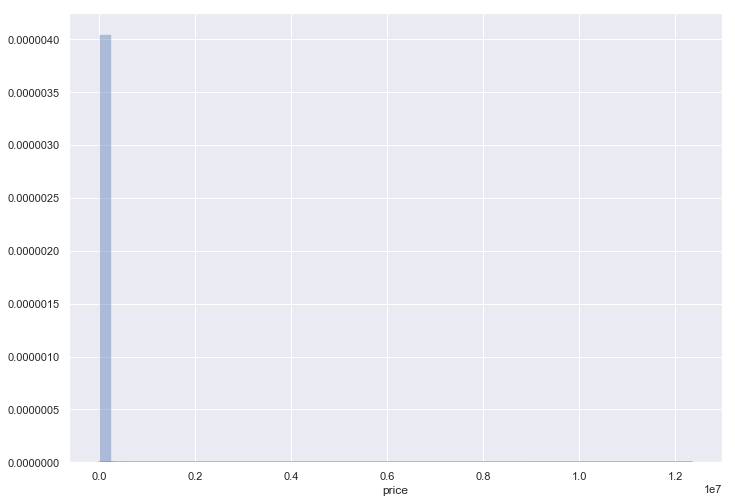

In [21]:
sns.distplot(cars['price'])

In [22]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

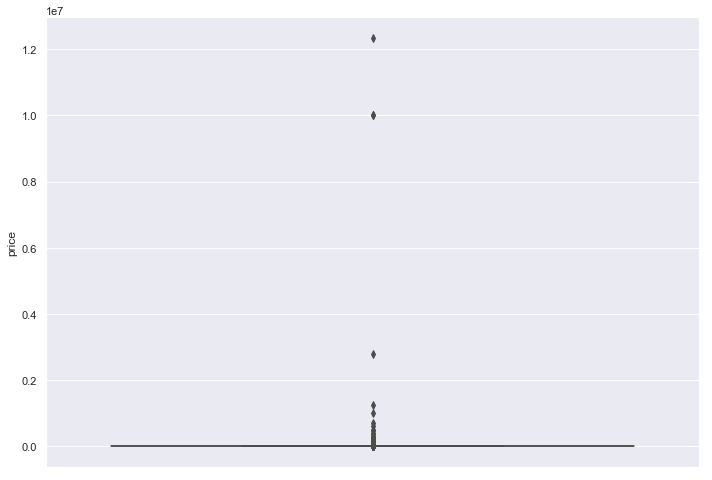

In [23]:
sns.boxplot(y=cars['price'])

In [24]:
sum(cars['price']>150000)

34

In [25]:
sum(cars['price']<100)
# working range 100 and 150000

1748

In [26]:
#vardible powerPS
power_count = cars['powerPS'].value_counts().sort_index()

In [27]:
power_count

0        5533
1           3
2           2
3           2
4           4
5          17
6           2
7           1
9           1
10          2
11          4
12          6
13          1
14          6
15          3
16          1
18          9
19          2
20          1
22          1
23          3
24          5
26         46
27          5
29          2
30          7
31          1
32          2
33          5
34         29
         ... 
1223        1
1256        1
1363        1
1416        1
1502        1
1595        1
1598        1
1625        1
1653        1
1799        1
1910        1
1968        1
1992        1
1998        1
2004        1
2017        1
2172        1
2461        1
2789        1
6226        1
11620       1
12510       1
12512       1
12684       1
15017       1
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64

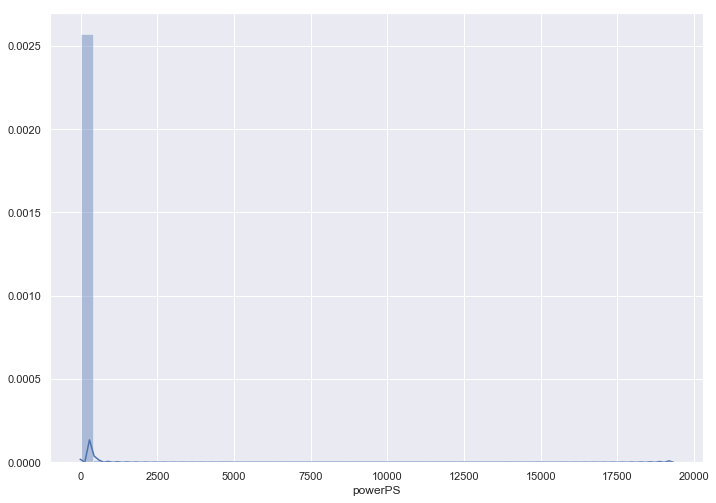

In [28]:
sns.distplot(cars['powerPS'])

In [29]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

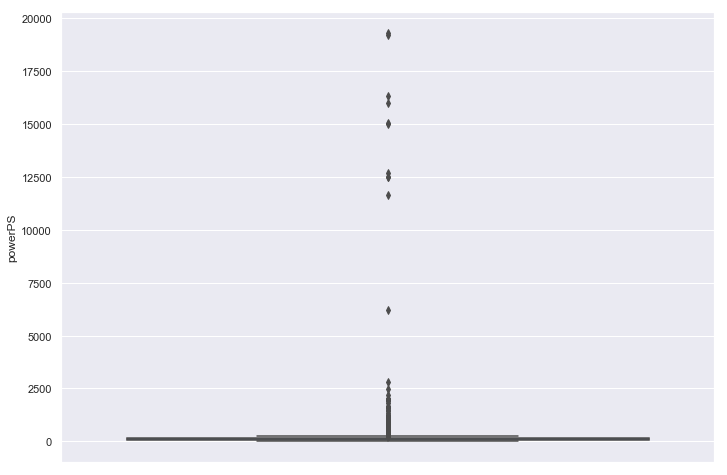

In [30]:
sns.boxplot(y=cars['powerPS'])

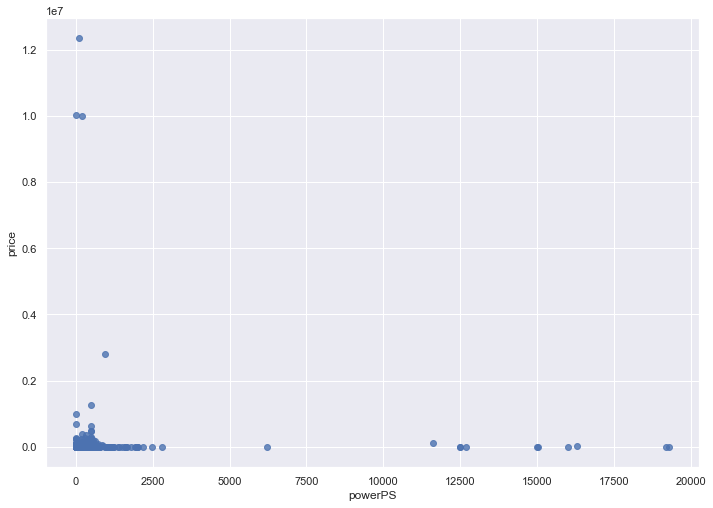

In [31]:
sns.regplot(x='powerPS',y = 'price', scatter= True ,
           fit_reg=False, data=cars)

In [32]:
sum(cars['powerPS']>500)

115

In [33]:
sum(cars['powerPS']<10)

#working range- 10 to 500

5565

# working range of data

In [34]:
cars = cars[
        (cars.yearOfRegistration <=2018)
       &(cars.yearOfRegistration>=1950)
       &(cars.price>=100)
       &(cars.price<=150000)
       &(cars.powerPS >=10)
       &(cars.powerPS<=500)]

#~6700 records are dropped

In [35]:
# Further to simplify - varible reduction
#combining yearaOfRegistration and monthOfregistartion

cars['monthOfRegistration']/12

0       0.250
1       0.500
2       0.917
3       1.000
4       0.917
5       0.167
7       0.917
8       1.000
9       0.333
10      0.083
11      0.333
12      0.750
13      0.000
14      0.417
15      0.250
16      0.833
17      0.667
18      0.000
20      0.750
21      0.000
22      0.333
23      0.250
24      0.250
25      0.500
26      1.000
27      0.250
28      0.750
29      0.667
30      0.250
32      0.500
         ... 
49963   0.833
49965   0.167
49966   1.000
49967   0.083
49968   0.667
49969   0.667
49970   0.417
49971   0.167
49972   0.417
49973   0.750
49974   0.333
49975   0.667
49976   0.250
49978   0.250
49979   0.333
49981   0.500
49982   0.500
49983   0.167
49984   0.250
49985   0.583
49986   0.833
49987   0.917
49988   0.750
49989   0.167
49990   0.250
49991   0.667
49992   0.750
49993   0.667
49995   0.250
50000   0.833
Name: monthOfRegistration, Length: 42772, dtype: float64

In [36]:
#Creating new varible age by adding yearOfregistration and monthOf registration

cars['Age']=(2018-cars['yearOfRegistration']+cars['monthOfRegistration'])
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

count   42772.000
mean       20.369
std         7.874
min         0.000
25%        15.000
50%        20.000
75%        25.000
max        76.000
Name: Age, dtype: float64

In [37]:
cars.shape

(42772, 15)

In [38]:
#droping yearoOfRegistration anf monthOfRegistration

cars = cars.drop(columns = ['yearOfRegistration','monthOfRegistration'],axis=1)

In [39]:
cars.shape

(42772, 13)

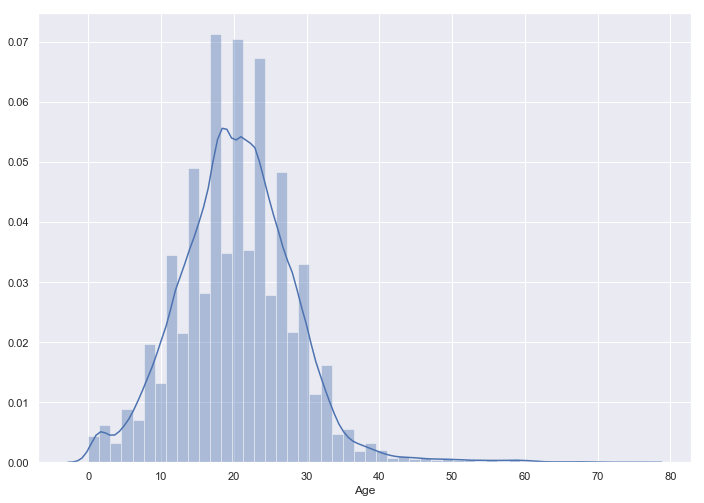

In [40]:
# Visualizing parameters
#Age

sns.distplot(cars['Age'])

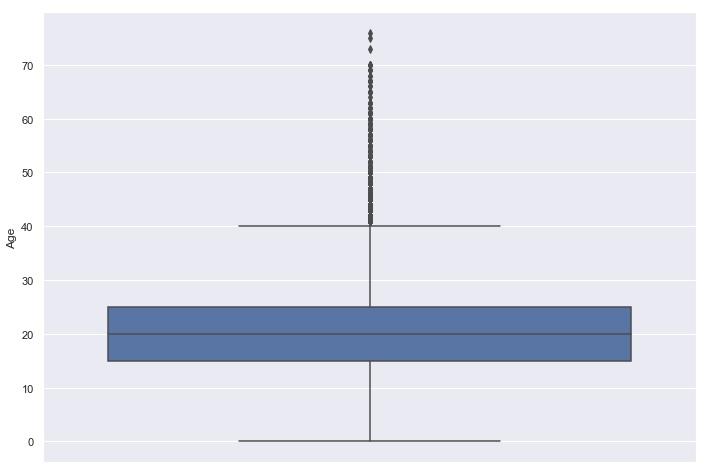

In [41]:
sns.boxplot(y=cars['Age'])

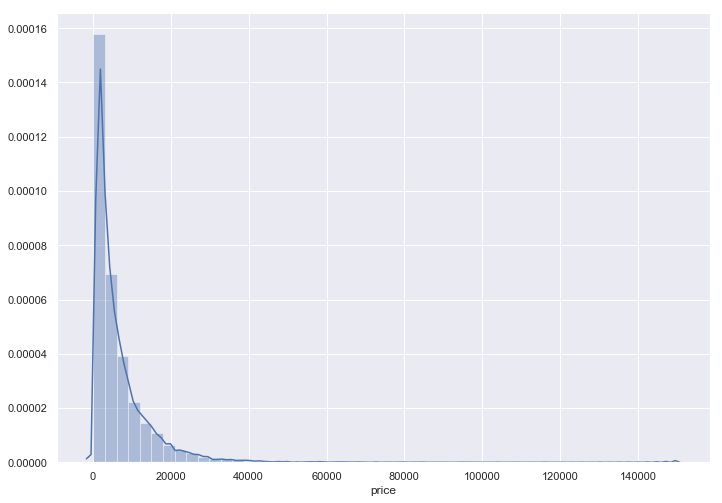

In [42]:
#price
sns.distplot(cars['price'])

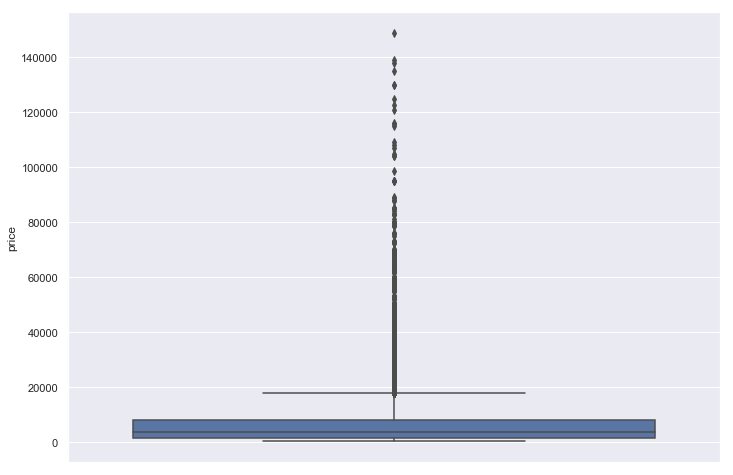

In [43]:
sns.boxplot(y= cars['price'])

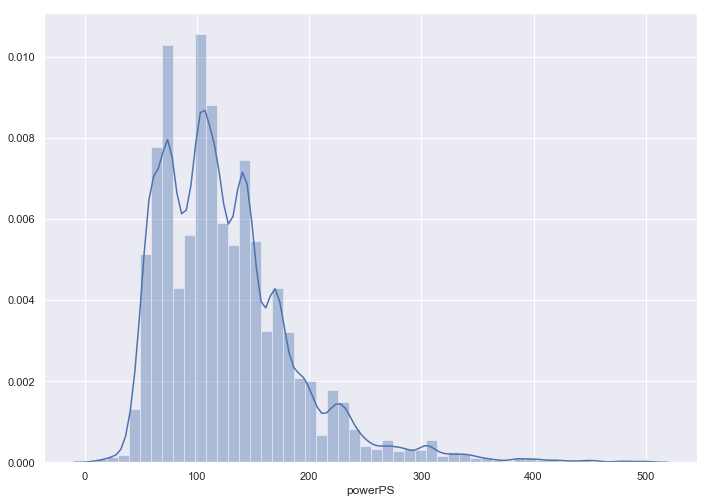

In [44]:
#powerPS

sns.distplot(cars['powerPS'])

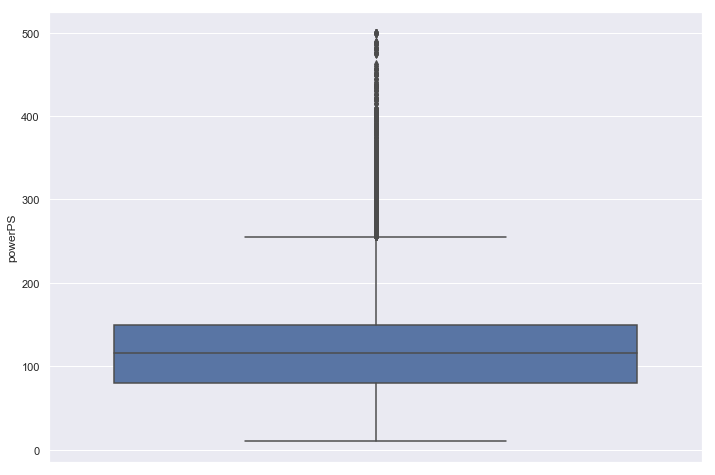

In [45]:
sns.boxplot(y=cars['powerPS'])

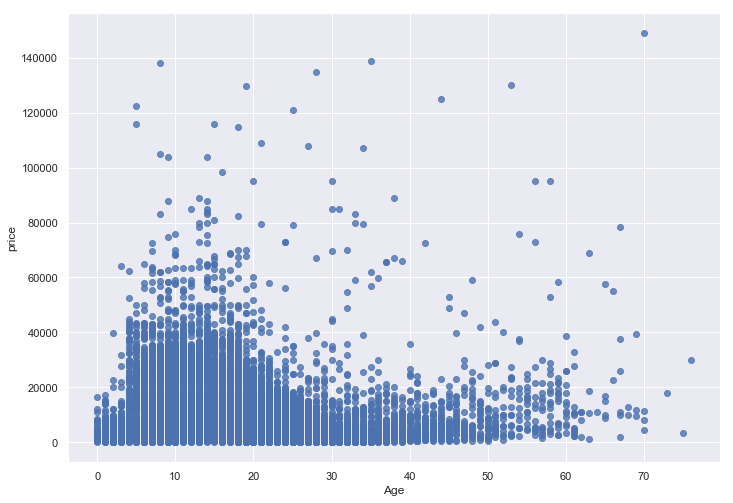

In [46]:
#visualizing parameters after narrowing working range

#Age vs Price
sns.regplot(x='Age' ,y ='price', scatter= True,
           fit_reg = False , data = cars)

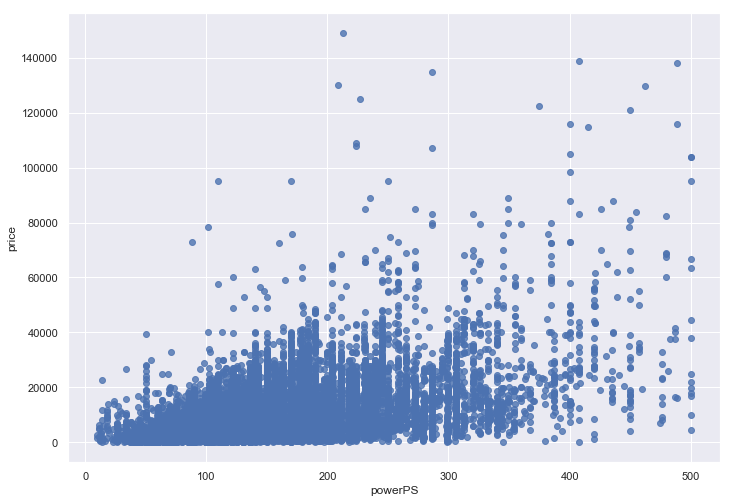

In [47]:
#powerPs vs price

sns.regplot(x='powerPS' ,y ='price', scatter= True,
           fit_reg = False , data = cars)

In [48]:
#variable Seller

cars['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [49]:
pd.crosstab(cars['seller'],columns='count',normalize=True)

col_0,count
seller,
commercial,0.000
private,1.000


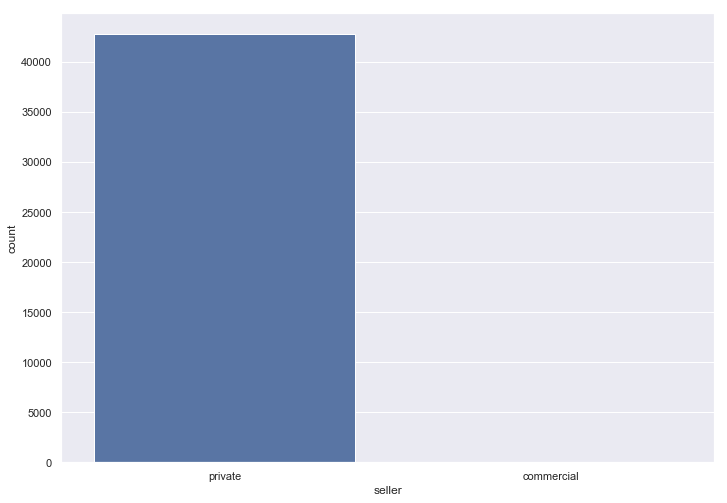

In [50]:
sns.countplot(x='seller',data=cars)

#fewer cars have 'commercial'=> insignificant

In [51]:
#variable offerType
cars['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

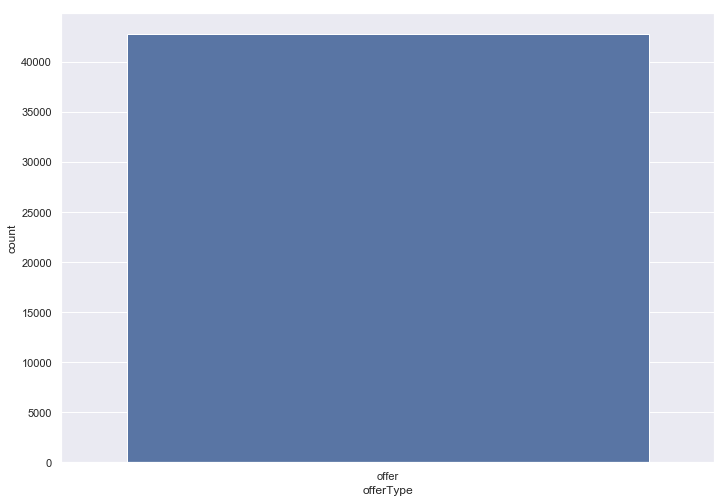

In [52]:
sns.countplot(x='offerType', data = cars)

#all cars have offer => insignificant

In [53]:
#variable abtest
cars['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [54]:
pd.crosstab(cars['abtest'],columns='count',normalize=True)

col_0,count
abtest,
control,0.483
test,0.517


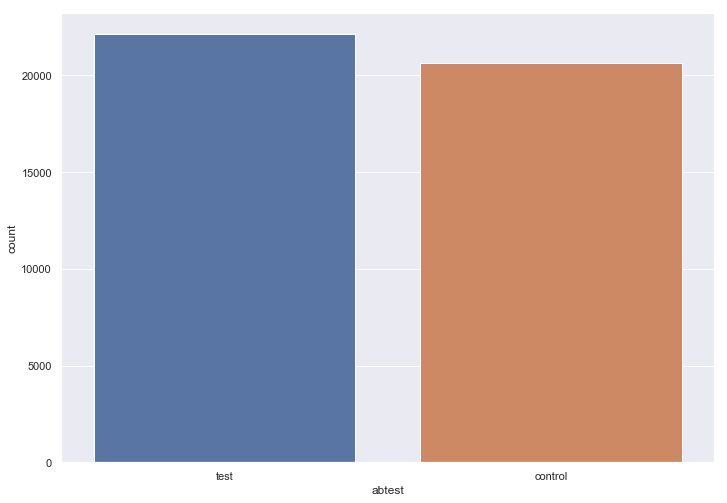

In [55]:
sns.countplot(x='abtest', data = cars)
#equally distributed

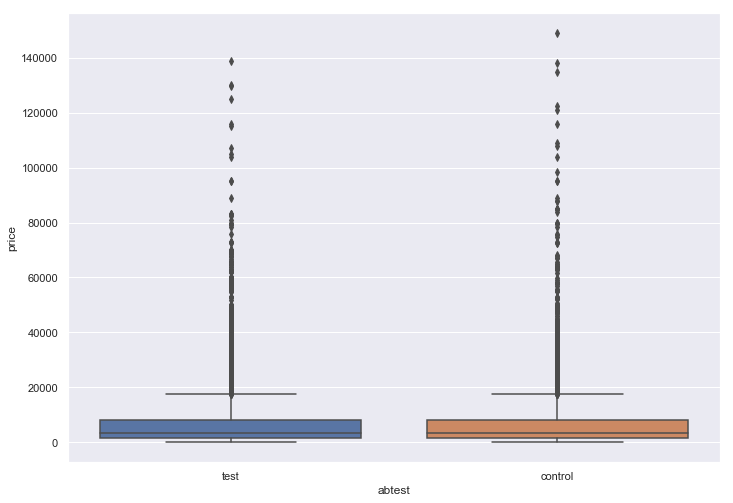

In [56]:
sns.boxplot(x='abtest',y= 'price',data=cars)
#for every price value there is almost 50-50 distributed
#does not affect price =>insignificant

In [57]:
#varible vehicletype
cars['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

In [58]:
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


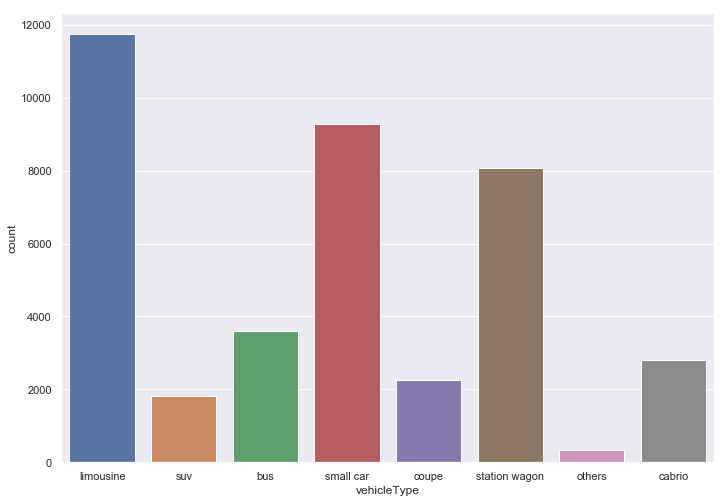

In [59]:
sns.countplot(x='vehicleType',data = cars)

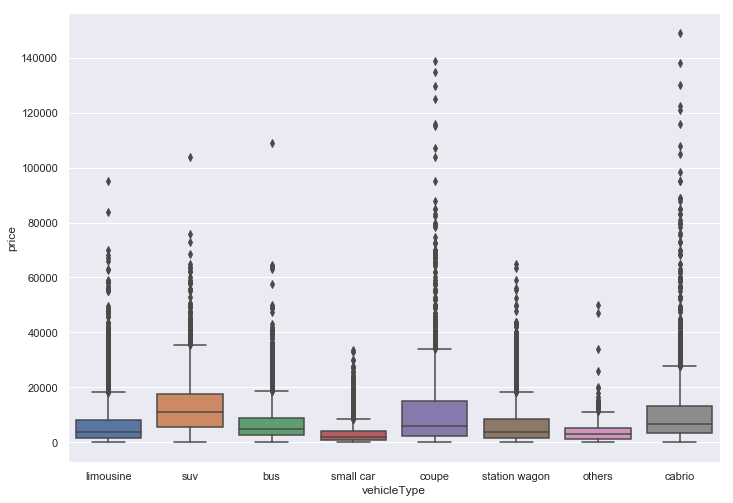

In [60]:
sns.boxplot(x='vehicleType' , y= 'price', data=cars)

In [61]:
#variable gearbox
cars['gearbox'].value_counts()

manual       32582
automatic     9396
Name: gearbox, dtype: int64

In [62]:
pd.crosstab(cars['gearbox'],columns='count',normalize=True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


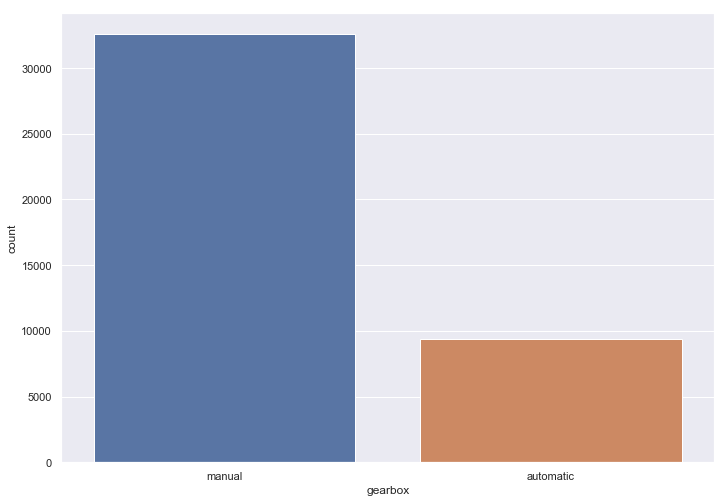

In [63]:
sns.countplot(x='gearbox',data=cars)

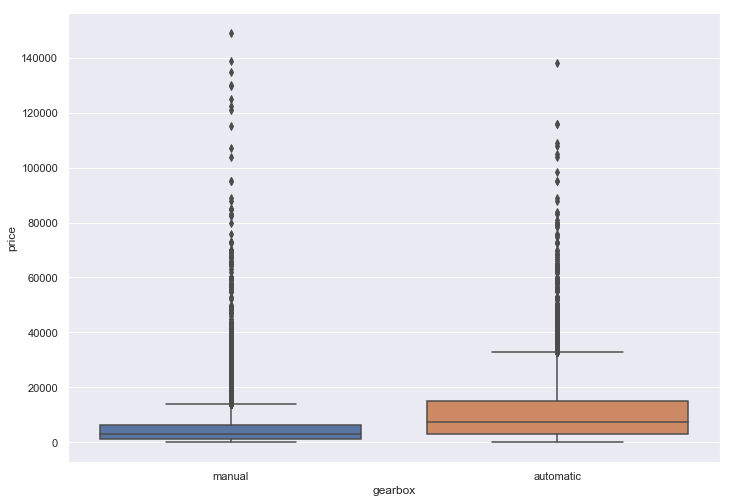

In [64]:
sns.boxplot(x='gearbox',y  = 'price',data=cars)

#gearbox affects price

In [65]:
#varible model
cars['model'].value_counts()

golf                  3478
others                2900
3er                   2482
polo                  1500
corsa                 1386
astra                 1276
a4                    1230
passat                1200
c_klasse              1042
5er                   1013
e_klasse               907
a3                     826
a6                     737
focus                  701
fiesta                 637
transporter            630
2_reihe                603
fortwo                 532
1er                    527
a_klasse               497
vectra                 491
twingo                 479
clio                   437
3_reihe                437
touran                 422
mondeo                 388
punto                  363
ibiza                  354
megane                 340
zafira                 325
                      ... 
antara                  10
kalos                   10
900                      9
nubira                   9
r19                      8
range_rover              8
c

In [66]:
pd.crosstab(cars['model'],columns='count',normalize=True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
1_reihe,0.004
1er,0.013
200,0.000
2_reihe,0.015


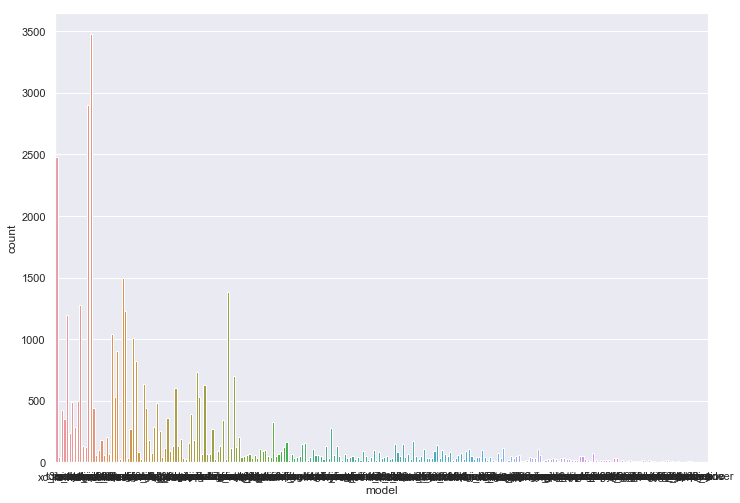

In [67]:
sns.countplot(x='model',data=cars)

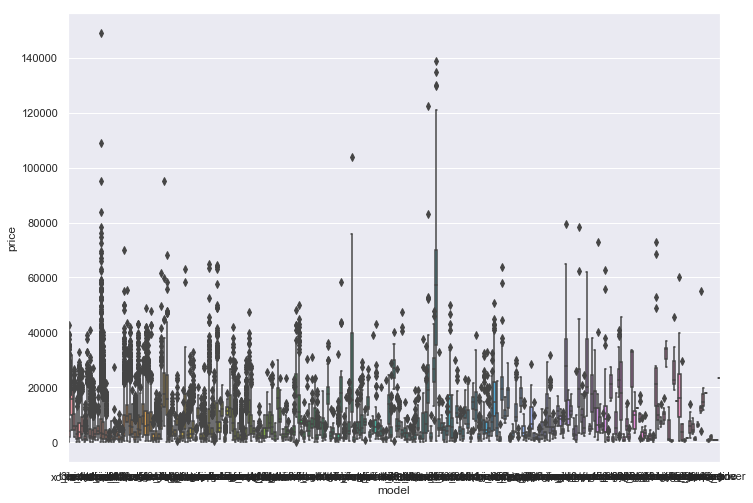

In [68]:
sns.boxplot(x='model',y= 'price',data=cars)

#cars are distributes over many models
#considered in modelling

In [69]:
#varible kilometer
cars['kilometer'].value_counts().sort_index()

5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64

In [70]:
pd.crosstab(cars['kilometer'],columns='count',normalize=True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


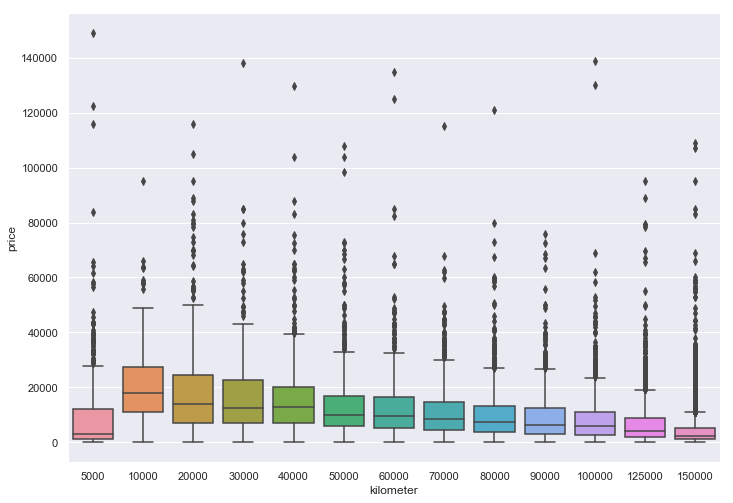

In [71]:
sns.boxplot(x='kilometer',y='price',data=cars)

In [72]:
cars['kilometer'].describe()

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

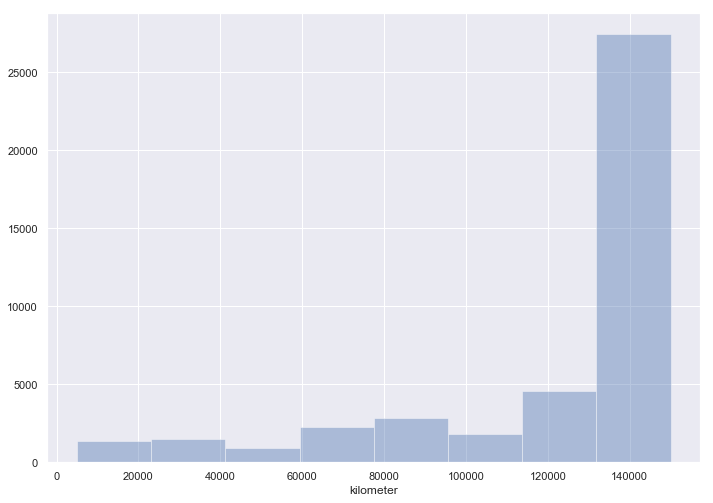

In [73]:
sns.distplot(cars['kilometer'],bins=8,kde=False)

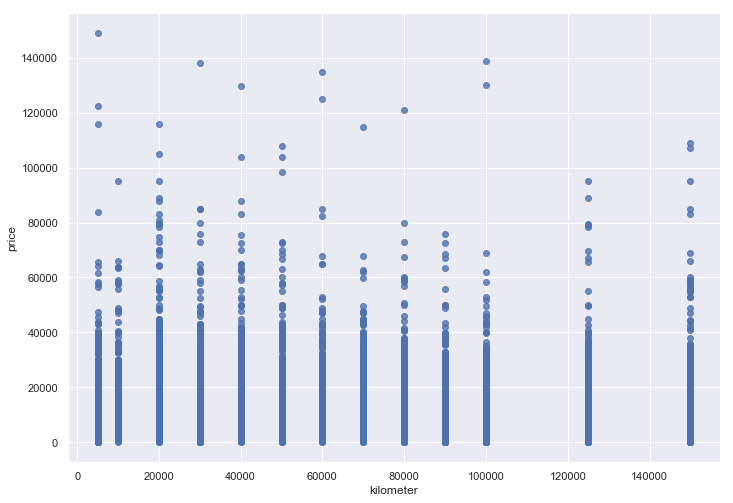

In [74]:
sns.regplot(x='kilometer',y='price',scatter=True,
           fit_reg=False,data=cars)
#cansidered in modelling

In [75]:
#varible fuelType
cars['fuelType'].value_counts()

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

In [76]:
pd.crosstab(cars['fuelType'],columns='count',normalize=True)

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


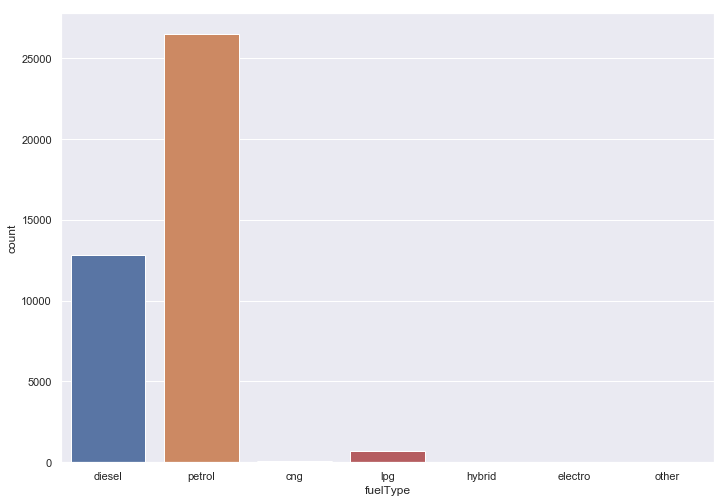

In [77]:
sns.countplot(x='fuelType',data=cars)

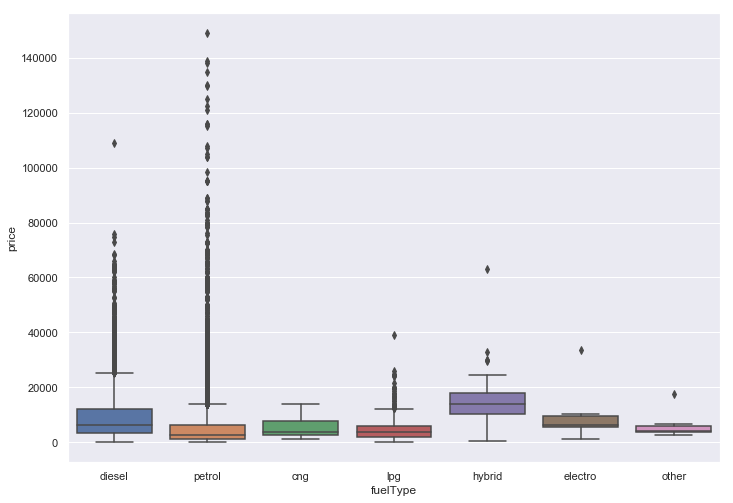

In [78]:
sns.boxplot(x='fuelType',y='price',data=cars)

#fuelType affects price

In [79]:
#variable brand

cars['brand'].value_counts()

volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
daewoo              53
rover               53
trabant             43
lada                22
Name: brand, dtype: int64

In [80]:
pd.crosstab(cars['brand'],columns='count',normalize=True)

col_0,count
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


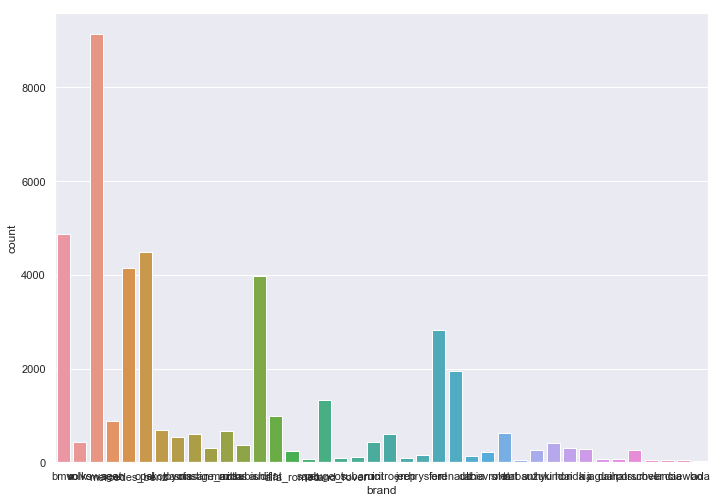

In [81]:
sns.countplot(x='brand',data=cars)

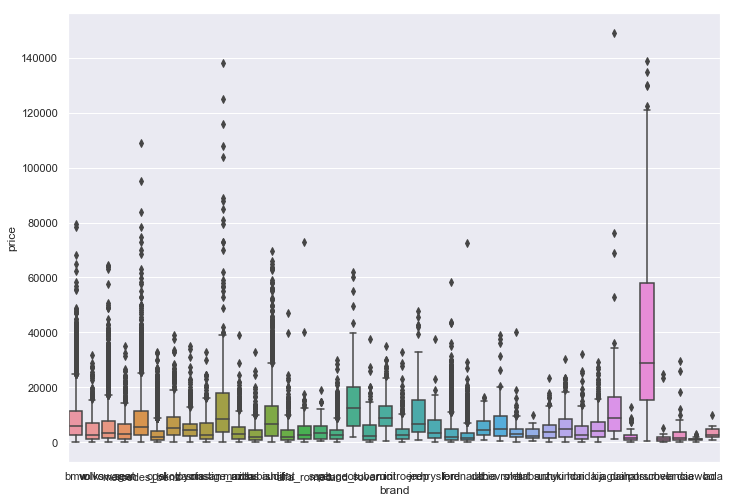

In [82]:
sns.boxplot(x='brand',y= 'price',data=cars)

#cars are distributed over many brands
#considered for modeling

In [83]:
#variable notRepairedDamage
#yes - car is damaged but not rectified
#no - car was damaged but has been rectified

cars['notRepairedDamage'].value_counts()

no     32507
yes     3988
Name: notRepairedDamage, dtype: int64

In [84]:
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)

col_0,count
notRepairedDamage,
no,0.891
yes,0.109


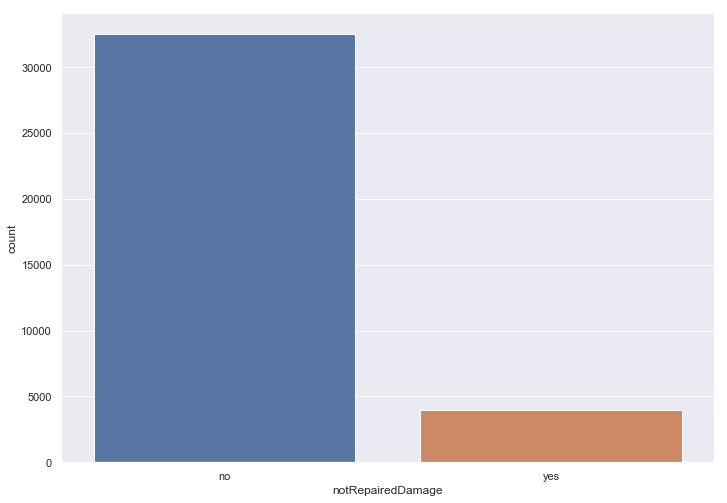

In [85]:
sns.countplot(x='notRepairedDamage',data =cars)

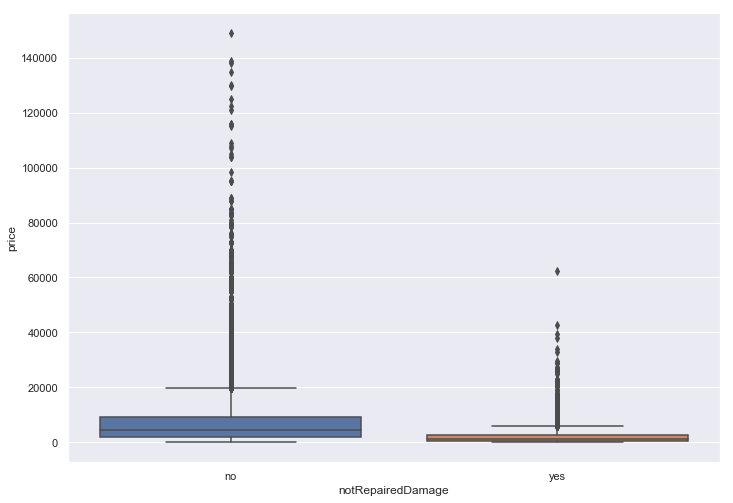

In [86]:
sns.boxplot(x='notRepairedDamage',y='price',data=cars)

#as expected the cars that require the damaged to be repaired
#fall under lower price ranges

In [87]:
#removing the insignificant variables
col=['seller','offerType','abtest']
col = cars.drop(columns=col ,axis=1)

In [88]:
cars_copy=cars.copy()

In [89]:
# correlation

cars_select1 = cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
round(correlation,3)

,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,-0.282
powerPS,0.575,1.000,-0.016,-0.120
kilometer,-0.440,-0.016,1.000,0.255
Age,-0.282,-0.120,0.255,1.000


In [90]:
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.282
Name: price, dtype: float64

In [91]:
""" we are going to bulid a liner regression and Random Forest model
on two sets of data.
1. data obtained by omitting rows with any missing value
2. data obtained by imputing the missing values
"""
# OMITTING MISSING VALUES

cars_omit = cars.dropna(axis=0)

In [93]:
cars_omit.shape

(32884, 303)

In [94]:
#importing Necessary Libaries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#Model Building with omitted Data

In [95]:
# Separating input and output features

x1 = cars_omit.drop(['price'],axis ='columns',inplace=False)
y1= cars_omit['price']


#plotting the variable price

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28ac1710>,
      dtype=object)

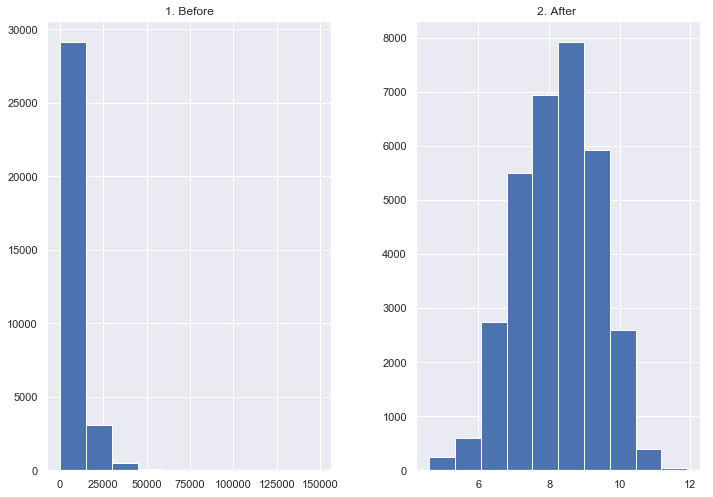

In [96]:
prices = pd.DataFrame({"1. Before":y1, "2. After ":np.log(y1)})
prices.hist()



In [97]:
# Transforing price as a logarithmic value
y1 = np.log(y1)

In [98]:
# Splitting data into test and train

X_train , X_test , y_train , y_test = train_test_split(x1,y1,test_size=0.3,random_state=3)
print(X_train.shape , X_test.shape, y_train.shape,y_test.shape)

(23018, 302) (9866, 302) (23018,) (9866,)


In [100]:
24574/32884
9866/32884

0.3000243279406398

In [101]:
# Baseline modle for omitted data

"""
we are making a base model by using test data mean value
this is to set a benchmark and to compare with our regression model

"""
#finding the mean for test data value

base_pred = np.mean(y_test)
print(base_pred)

8.249615787653337


In [102]:
#repeating same value till length of test data

base_pred = np.repeat(base_pred,len(y_test))

In [103]:
#finding the RMSE
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test,base_pred))
print(base_root_mean_square_error)

1.1274483657478247


## linear regression with omitted data

In [104]:
#setting the intercept as true
lgr = LinearRegression(fit_intercept=True)

In [106]:
#model
model_lin1 = lgr.fit(X_train,y_train)

In [107]:
#Predication model on test set
cars_predications_lin1 = lgr.predict(X_test)

In [109]:
#computing MSE and RMSE
lin_msel = mean_squared_error(y_test,cars_predications_lin1)
lin_rmsel = np.sqrt(lin_msel)
print(lin_rmsel)

0.582713539137487


In [110]:
# R squared value
r2_lin_test1 = model_lin1.score(X_test,y_test)
r2_lin_train1 = model_lin1.score(X_train,y_train)
print(r2_lin_test1,r2_lin_train1)

0.7328735485752195 0.7540929516546161


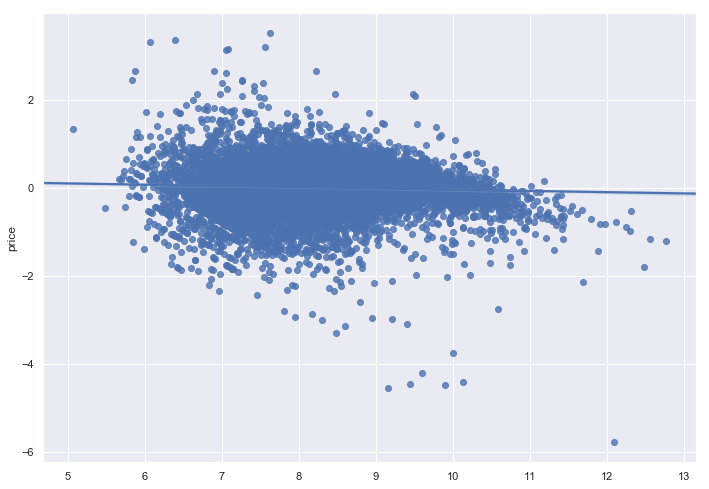

In [123]:
#Regression diagnostics - residual plot analysis

residuals1 = y_test-cars_predications_lin1
#sns.regplot(x=cars_predications_lin1,y=residuals1,scatter=True,
#           fit_reg=False)


sns.regplot(x=cars_predications_lin1,y=residuals1,scatter=True,
           fit_reg=True)


In [117]:
residuals1.describe()

count   9866.000
mean       0.005
std        0.583
min       -5.777
25%       -0.303
50%        0.044
75%        0.360
max        3.511
Name: price, dtype: float64

### Random Forest WIth omitted data

In [119]:
#Model parameters
rf = RandomForestRegressor(n_estimators=100,max_features='auto',
                          max_depth=100,min_samples_split=10,
                          min_samples_leaf=4,random_state=1)

In [125]:
#modle
model_rf1 = rf.fit(X_train,y_train)

In [126]:
#predicating model on test set
car_predictions_rf1 = rf.predict(X_test)

In [127]:
#computing MSE and RMSE
rf_msel = mean_squared_error(y_test,car_predictions_rf1)
rf_rmsel = np.sqrt(rf_msel)
print(rf_rmsel)

0.5264367579814131


In [188]:
# R squared value
r2_rf_test1 = model_rf1.score(X_test,y_test)
r2_rf_train1= model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)

0.7819786176513188 0.8790889157921673


In [1]:
#Final OUTPUT
print("missing value omitted")
print("R squared value for train from liner regression = %s" %r2_lin_train1)
print("R squared value for test from liner regression = %s" %r2_lin_test1)
print("R squared value for train from random forest = %s" %r2_rf_train1)
print("R squared value for test from random forest = %s" %r2_rf_test1)
print("RMSE value for test from Liner regression = %s" %lin_rmsel)
print("RMSE value for test from Random forest = %s" %rf_rmsel)

missing value omitted


NameError: name 'r2_lin_train1' is not defined